<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#pythonによる最小2乗法" data-toc-modified-id="pythonによる最小2乗法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>pythonによる最小2乗法</a></span><ul class="toc-item"><li><span><a href="#python-code" data-toc-modified-id="python-code-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>python code</a></span></li></ul></li><li><span><a href="#最小2乗法の原理" data-toc-modified-id="最小2乗法の原理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>最小2乗法の原理</a></span></li><li><span><a href="#$\chi^2$の極小値から(2変数の例)" data-toc-modified-id="$\chi^2$の極小値から(2変数の例)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>$\chi^2$の極小値から(2変数の例)</a></span></li><li><span><a href="#正規方程式(Normal-Equations)による解" data-toc-modified-id="正規方程式(Normal-Equations)による解-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>正規方程式(Normal Equations)による解</a></span><ul class="toc-item"><li><span><a href="#python-codeによる具体例" data-toc-modified-id="python-codeによる具体例-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>python codeによる具体例</a></span></li></ul></li><li><span><a href="#特異値分解(Singular-Value-Decomposition)による解" data-toc-modified-id="特異値分解(Singular-Value-Decomposition)による解-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>特異値分解(Singular Value Decomposition)による解</a></span></li><li><span><a href="#scipy.linalg.lstsq" data-toc-modified-id="scipy.linalg.lstsq-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>scipy.linalg.lstsq</a></span><ul class="toc-item"><li><span><a href="#正規方程式によるのも．．．" data-toc-modified-id="正規方程式によるのも．．．-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>正規方程式によるのも．．．</a></span></li></ul></li><li><span><a href="#2次元曲面へのフィット" data-toc-modified-id="2次元曲面へのフィット-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2次元曲面へのフィット</a></span><ul class="toc-item"><li><span><a href="#具体例" data-toc-modified-id="具体例-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>具体例</a></span></li></ul></li><li><span><a href="#課題" data-toc-modified-id="課題-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>課題</a></span><ul class="toc-item"><li><span><a href="#1次元の線形最小二乗法" data-toc-modified-id="1次元の線形最小二乗法-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>1次元の線形最小二乗法</a></span></li><li><span><a href="#2次元の最小二乗フィット" data-toc-modified-id="2次元の最小二乗フィット-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>2次元の最小二乗フィット</a></span></li></ul></li></ul></div>

<br />

<div style="text-align: center;">
<font size="7">線形最小2乗法(LeastSquareFit)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/Users/bob/Github/TeamNishitani/jupyter_num_calc/leastsquarefit</font>
<br />
<font size="4">https://github.com/daddygongon/jupyter_num_calc/tree/master/notebooks_python</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017-19 </font>
</div>


# pythonによる最小2乗法

前章では，データに多項式を完全にフィットする補間についてみた．今回は，近似的にフィットする最小二乗法について詳しくみていく．図のようなデータに直線をフィットする場合を考えよう．



## python code

x = [1,2,3,4], y=[0,5,15,24]に$y=a0+a1\,x$をフィットする例を考える．
pythonのcodeは以下の通り．

/Users/bob/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[-9.5  8.2]


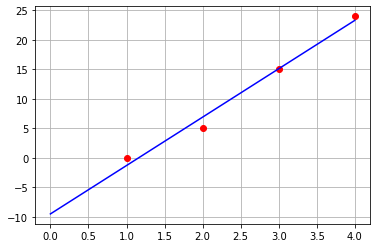

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a0, a1): #, a2):
    return a0 + a1*x #+ a2*x**2

xdata = np.array([1,2,3,4])
ydata = np.array([0,5,15,24])
plt.plot(xdata,ydata, 'o', color='r')

params, cov = curve_fit(f, xdata, ydata)
print(params)

x =np.linspace(0,4,20)
y = f(x,params[0],params[1])  #,params[2])
plt.plot(x,y, color='b')

plt.grid()
plt.show()

結果，a0=-9.5, a1=8.2にfitされることがわかる．

# 最小2乗法の原理



もっとも簡単な例で原理を解説する．近似関数として，

$$
F(x) = a_0+a_1\,x
$$
という直線近似を考える．もっともらしい関数は$N$点の測定データとの差$d_i = F(x_i)-y_i$を最小にすればよさそうであるが，これはプラスマイナスですぐに消えて不定になる．そこで，

$$
\chi^{2}=\sum_i^N d_i^2=\sum_i^N\left(a_0+a_1\,x_i-y_i\right)^2
$$
という関数を考える．この$\chi^2$(カイ二乗)関数が，$a_0, a_1$をパラメータとして変えた時に最小となる$a_0, a_1$を求める．これは，それらの微分がそれぞれ0となる場合である．これは$\chi^2$の和$\sum$(sum)の中身を展開し，

&nbsp;

$\chi^2=$

&nbsp;

$a_0, a_1$でそれぞれ微分すれば

&nbsp;

$ \frac{\partial}{\partial a_0} \chi^2=$

&nbsp;

$ \frac{\partial}{\partial a_1} \chi^2=$

&nbsp;

という$a_0, a_1$を未知変数とする2元の連立方程式が得られる．これは前に説明した通り逆行列で解くことができる．




# $\chi^2$の極小値から(2変数の例)

先ほどの例をもとに何をしているか別の角度からみる．
データを関数に入れてsumをとると次のような関数が得られる．

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

a0, a1 = symbols('a0, a1')
def func(x):
    return a0+a1*x

def z_surf(xx,yy):
    sum = 0
    for i in range(0,4):
        tmp = xx[i] - yy[i]
        sum = sum + tmp*tmp
    return sum

x1 = np.array([1,2,3,4])
y1 = np.array([0,5,15,24])
eq = z_surf(func(x1),y1)
print(eq)
print(expand(eq))

(a0 + a1)**2 + (a0 + 2*a1 - 5)**2 + (a0 + 3*a1 - 15)**2 + (a0 + 4*a1 - 24)**2
4*a0**2 + 20*a0*a1 - 88*a0 + 30*a1**2 - 302*a1 + 826


これはa0,a1を変数とする関数となっている．
データ点(xi,yi)はすでに数値を持っており，未知なのはa0,a1である．
そうすると$\chi^2(a0,a1)$, つまりa0,a1をパラメータとして，$\chi^2$の値をz軸とする3次元関数とみなすことができて，それをplotすると次の通り．

<IPython.core.display.Javascript object>


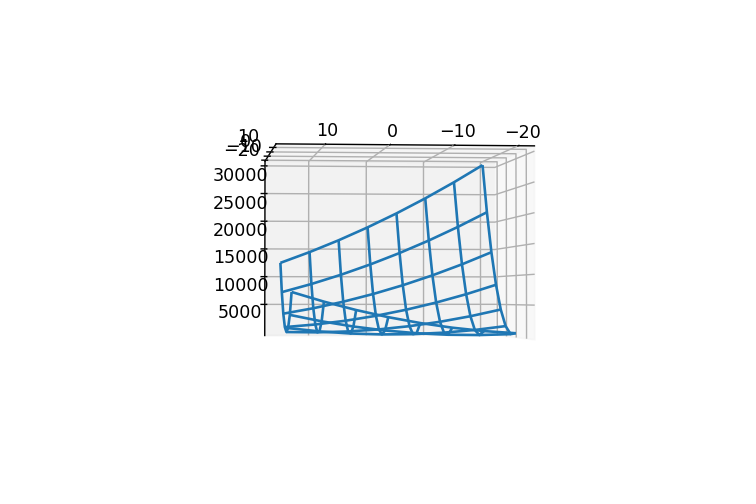

In [12]:
%matplotlib notebook
# or inline for vscode
def f(a0, a1):
    return 4*a0**2 + 20*a0*a1 - 88.0*a0 + 30*a1**2 - 302.0*a1 + 826.0
 
a0 = np.arange(-20, 20, 5)
a1 = np.arange(-20, 20, 5)
A0, A1 = np.meshgrid(a0, a1)
Z1 = f(A0, A1)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(A0, A1, Z1) 

plt.show()

a0=-9.5, a1=8.2あたりに最小値があるはずですが．．．見にくいよね．
こういうのをsteepな関数って言いますが，それが後で述べる特異値分解を使わなければいけない理由です．
値が微妙でなければ，微分して0において，連立方程式とみなして解くことができます．
それが，上の「最小2乗法の原理」で述べた解法になります．

# 正規方程式(Normal Equations)による解



より一般的な場合の最小二乗法の解法を説明する．先程の例では1次の多項式を近似関数とした．これをより一般的な関数，例えば，$\sin, \cos, \tan, \exp, \sinh$などとする．これを線形(linear)につないだ関数を

$$
F \left(x \right)=a _{0}\sin \left(x \right)+a _{1}\cos \left(x \right)+a _{2}\exp \left(-x \right)+a _{3}\sinh \left(x \right)+\cdots ={\sum_{k=1}^{M}}a _{k }X _{k }\left(x \right)
$$
ととる．実際には，$X_k(x)$はモデルや，多項式の高次項など論拠のある関数列をとる．これらを基底関数(base functions)と呼ぶ．ここで線形といっているのは，パラメータ$a_k$について線形という意味である．このような，より一般的な基底関数を使っても，$\chi^2$関数は

$$
{\chi}^{2}=\sum _{i=1}^{N} \left( F \left( x_{{i}} \right) -y_{{i}} \right) ^{2}
=\sum _{i=1}^{N} \left( \sum _{k=1}^{M}a_{{k}}X_{{k}} \left( x_{{i}} \right) -y_{{i}} \right) ^{2}
$$
と求めることができる．
この関数を，$a_k$を変数とする関数とみなす．
この関数が最小値を取るのは，
$\chi^2$を$M$個の$a_k$で偏微分した式がすべて0となる場合である．
これを実際に求めてみると，

$$
\sum _{i=1}^{N} \left( \sum _{j=1}^{M}a_{{j}}X_{{j}} \left( x_{{i}} \right) -y_{{i}} \right) X_{{k}} \left( x_{{i}} \right) =0
$$
となる．ここで，$k = 1..M$の$M$個の連立方程式である．この連立方程式を最小二乗法の正規方程式(normal equations)と呼ぶ．

上記の記法のままでは，ややこしいので，行列形式で書き直す．$N \times M$で，各要素を

$$
A_{ij} = X_j(x_i)
$$
とする行列$A$を導入する．この行列は，

$$
A=\left[
\begin{array}{cccc}
X_1(x_1) & X_2(x_1) & \cdots & X_M(x_1) \\
\vdots & \vdots & \cdots & \vdots \\
\vdots & \vdots & \cdots & \vdots \\
\vdots & \vdots & \cdots & \vdots \\
X_1(x_N) & X_2(x_N) & \cdots & X_M(x_N) 
\end{array}
\right]
$$
となる．これをデザイン行列と呼ぶ．すると先程の正規方程式は，

$$
A^t . A . a = A^t . y
$$
で与えられる．$A^t$は行列$A$の転置(transpose)

$$
A^t = A_{ij}^t = A_{ji}
$$
を意味し，得られた行列は，$M \times N$である．$a, y$はそれぞれ，

$$
a=\left[
\begin{array}{c}
a_1\\a_2\\\vdots\\a_M
\end{array}
\right],\,
y=\left[
\begin{array}{c}
y_1\\y_2\\\vdots\\y_N
\end{array}
\right]
$$
である．

$M = 3, N = 25$として行列の次元だけで表現すると，

$$
\left[
\begin{array}{ccccc}
&  & \cdots & &\\
\cdots & \cdots &  \cdots & \cdots & \cdots \\
&  & \cdots & &\\
\end{array}
\right]
\left[
\begin{array}{ccc}
& \vdots &\\
& \vdots &\\
\cdots & \cdots &  \cdots\\
& \vdots &\\
& \vdots &\\
\end{array}
\right]
\left[
\begin{array}{c}
\vdots\\
\vdots\\
\vdots
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
&  & \cdots & &\\
\cdots & \cdots &  \cdots & \cdots & \cdots \\
&  & \cdots & &\\
\end{array}
\right]
\left[
\begin{array}{c}
\vdots\\
\vdots\\
\vdots\\
\vdots\\
\vdots
\end{array}
\right]
$$
となる．これは少しの計算で$3 \times 3$の逆行列を解く問題に変形できる．




## python codeによる具体例 

4点のデータに対して，2次関数つまり3個のパラメータでfitする．
その場合，デザイン行列は4行3列になる．


In [4]:
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

xdata=np.array([1,2,3,4])
ydata=np.array([0,5,15,24])

def ff(x,i):
    return x**i

Av = np.zeros([4,3])
for i in range(0,3):
    for j in range(0,4):
        Av[j][i]=ff(xdata[j],i)

pprint(Av)

Ai = linalg.inv(np.dot(np.transpose(Av),Av))
b = np.dot(np.transpose(Av),ydata)
np.dot(Ai,b)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])


array([-4.5,  3.2,  1. ])

# 特異値分解(Singular Value Decomposition)による解


正規方程式を解くときには，少し注意が必要である．単純な逆行列による解法では，間違った答えに行き着く可能性が高い．より信頼性の高い方法では，特異値分解を用いる．正規方程式での共分散行列,特異値分解の導出や標準偏差との関係はNumRecipeを参照せよ．

In [5]:
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

xdata=np.array([1,2,3,4])
ydata=np.array([0,5,15,24])

#def f(x,a1,a2,a3):
#    return a1+a2*x+a3*x**2
def ff(x,i):
    return x**i

Av = np.zeros([4,3])
for i in range(0,3):
    for j in range(0,4):
        Av[j][i]=ff(xdata[j],i)
m,n = Av.shape
pprint(Av)

U, s, Vs = linalg.svd(Av)
pprint(s)
S = linalg.diagsvd(s,m,n)
pprint(S)
iS = np.zeros([3,4])
for i in range(0,3):
    iS[i][i] = 1.0/s[i]
print(iS)
left = np.dot(np.transpose(Vs),iS)
right= np.dot(np.transpose(U),ydata)
np.dot(left,right)
#print(right)

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])
array([19.62136402,  1.71206987,  0.26625288])
array([[19.62136402,  0.        ,  0.        ],
       [ 0.        ,  1.71206987,  0.        ],
       [ 0.        ,  0.        ,  0.26625288],
       [ 0.        ,  0.        ,  0.        ]])
[[0.05096486 0.         0.         0.        ]
 [0.         0.58408831 0.         0.        ]
 [0.         0.         3.75582793 0.        ]]


array([-4.5,  3.2,  1. ])

# scipy.linalg.lstsq

scipy.linalg.lstsqによるcurve fitについて紹介しておく.
あらかじめ，デザイン行列$A$を作っておいて，これを
$$
A x = b
$$
とみなした場合の$x$について解く．



In [6]:
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

xdata=np.array([1,2,3,4])
ydata=np.array([0,5,15,24])

def ff(x,i):
    return x**i

Av = np.zeros([4,3])
for i in range(0,3):
    for j in range(0,4):
        Av[j][i]=ff(xdata[j],i)
print(Av)

c, resid, rank, sigma = linalg.lstsq(Av, ydata)
print(c,resid,rank,sigma)


[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]
[-4.5  3.2  1. ] 1.8000000000000007 3 [19.62136402  1.71206987  0.26625288]


## 正規方程式によるのも．．．

lstsqは~~正規方程式~~によるのと同じかな．SVD!!

In [7]:
Ai = linalg.inv(np.dot(np.transpose(Av),Av))
b = np.dot(np.transpose(Av), ydata)
np.dot(Ai,b)

array([-4.5,  3.2,  1. ])

# 2次元曲面へのフィット



先程の一般化をより発展させると，3次元$(x_i, y_i, z_i)$で提供されるデータへの，2次元平面でのフィットも可能となる．2次元の単純な曲面は，方程式を使って，

$$
F(x, y) = a_1+a_2\,x+a_3\,y+a_4\,xy+a_5\,x^2+a_6\,y^2
$$
となる．デザイン行列の$i$行目の要素は，

$$
[1,\, x_i,\, y_i,\, x_i \, y_i,\, x_i^2,\, y_i^2]
$$
として，それぞれ求める．このデータの変換の様子をpythonスクリプトで詳しく示した．後は，通常の正規方程式を解くようにすれば，このデータを近似する曲面を定めるパラメータ$a_1, a_2, \cdots,a_6$が求まる．最小二乗法はパラメータ$a_k$について線形であればよい．




## 具体例 
実際のデータ解析での例．データの座標をx,y,zで用意して，scipy.linalgのlinalg.lstsqでfitしている．
正規方程式による解法，つまり逆行列で求めた値と一致していることを確認してください．


In [8]:
import numpy as np
z = np.array([0.000046079702088, 0.000029479057275,
  0.000025769637830, 0.000034951410953, 0.000057024385455, 0.000029485453808,
  0.000011519913869, 0.000006442404299, 0.000014252898382, 0.000034951410953,
  0.000025769637773, 0.000006442404242, 0.000000000000057, 0.000006442404242,
  0.000025769637773, 0.000034932221524, 0.000014246501905, 0.000006442404299,
  0.000011519913926, 0.000029479057332, 0.000056973214100, 0.000034932221467,
  0.000025769637773, 0.000029485453808, 0.000046079702031])
x = []
y = []
for i in range(-2,3):
    for j in range(-2,3):
        x.append(i*0.0005)
        y.append(j*0.0005)
print(x)
print(y)

[-0.001, -0.001, -0.001, -0.001, -0.001, -0.0005, -0.0005, -0.0005, -0.0005, -0.0005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.001, 0.001, 0.001, 0.001, 0.001]
[-0.001, -0.0005, 0.0, 0.0005, 0.001, -0.001, -0.0005, 0.0, 0.0005, 0.001, -0.001, -0.0005, 0.0, 0.0005, 0.001, -0.001, -0.0005, 0.0, 0.0005, 0.001, -0.001, -0.0005, 0.0, 0.0005, 0.001]


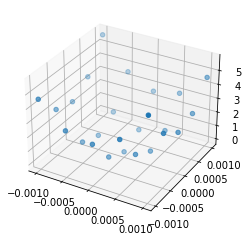

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(np.array(x),np.array(y),z) 

plt.show()

In [10]:
from pprint import pprint
import scipy.linalg as linalg

n = z.size
n_j = 6
bb=np.zeros([n])
A=np.zeros([n,n_j])
for i in range(0,n):
    A[i,0]=1
    A[i,1]=x[i]
    A[i,2]=y[i]
    A[i,3]=x[i]*y[i]
    A[i,4]=x[i]**2
    A[i,5]=y[i]**2
    bb[i]=z[i]

c, resid, rank, sigma = linalg.lstsq(A, bb)
pprint(c)

Ai = linalg.inv(np.dot(np.transpose(A),A))
b = np.dot(np.transpose(A),bb)
np.dot(Ai,b)

array([-9.18521216e-13, -6.39644675e-06,  6.39644220e-06, -5.45955358e+00,
        2.57696284e+01,  2.57696284e+01])


array([-9.18525706e-13, -6.39644676e-06,  6.39644220e-06, -5.45955358e+00,
        2.57696284e+01,  2.57696284e+01])

<IPython.core.display.Javascript object>


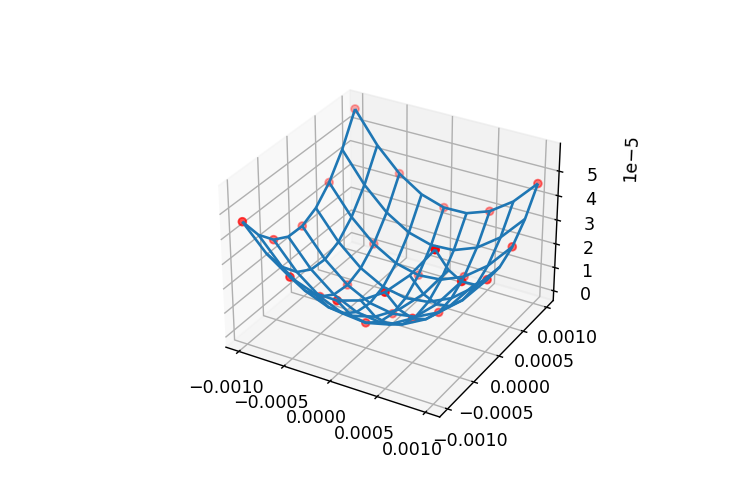

In [11]:
%matplotlib notebook 
# for jupyter notebook
# %matplotlib inline # for vscode


def z_surf(xx,yy):
    val = c[0] + c[1]*xx + c[2]*yy
    val += c[3]*xx*yy + c[4]*xx**2
    val += c[5]*yy**2
    return val

x1 = np.arange(-0.001, 0.00125, 0.00025)
y1 = np.arange(-0.001, 0.00125, 0.00025)
X, Y = np.meshgrid(x1, y1)
Z1 = z_surf(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(np.array(x),np.array(y),z, color='r') 
ax.plot_wireframe(X,Y,Z1) 

plt.show()

# 課題


##  1次元の線形最小二乗法

次の4点のデータを$y = a_0+a_1 x+a_2 x^2$で近似せよ(2006年度期末試験)．
```python
xdata = np.array([1,2,3,4])
ydata = np.array([1,3,4,10])
```

##  2次元の最小二乗フィット

以下のデータを

$$
f(x, y) = a_0+a_1 x+a_2 y+a_3 xy
$$
で近似せよ
```python
 x,  y,  z
-1, -1,  2.00000
-1,  0,  0.50000
-1,  1, -1.00000
 0, -1,  0.50000
 0,  0,  1.00000
 0,  1,  1.50000
 1, -1, -1.00000
 1,  0,  1.50000
 1,  1,  4.00000
```


結果は以下の通り．鞍点になってます．

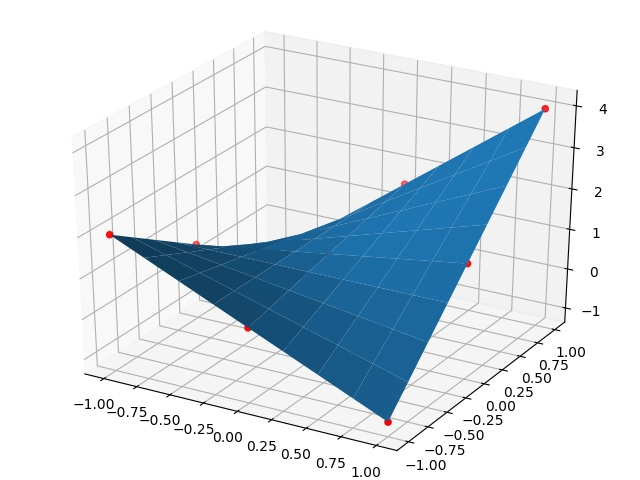